In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np
import wave as wv
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile
from sklearn.decomposition import FastICA

from IPython.display import Audio

# Get samples from wav files

5564.16372545


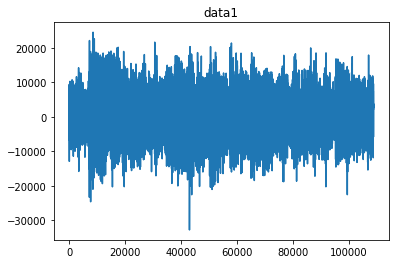

2619.18445716


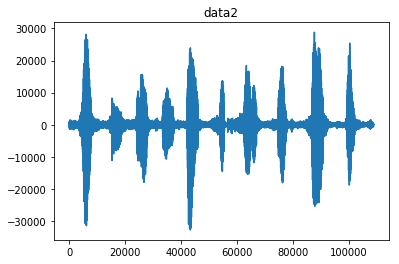

In [3]:
sourceFilesPrefix="ExpectedResults\\music-"
resultFilesPrefix="AudioResults\\fromExpected-"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
print(sample1_data.std(axis=0))
plt.figure(1)
plt.plot(sample1_data)
plt.title("data1")
plt.show()

rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
print(sample2_data.std(axis=0))
plt.figure(2)
plt.plot(sample2_data)
plt.title("data2")
plt.show()


In [4]:
Audio(sourceFilesPrefix+"1.wav")

In [5]:
Audio(sourceFilesPrefix+"2.wav")

[-2896 -2354 -1967 ...,  3136  3623  2741]
[424 646 433 ..., 238 225  81]
108911
108911


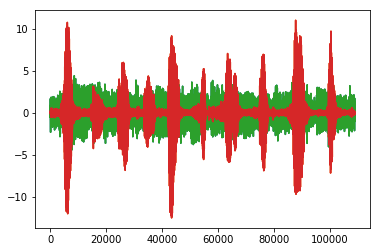

In [6]:
print(sample1_data)
print(sample2_data)
print(len(sample1_data))
print(len(sample2_data))
S1=np.c_[sample1_data,sample2_data]
S2=np.c_[sample1_data,sample2_data]
#print(S)
#median=S.std(axis=0)
#print(median)
#S= S/median

#S1/=S1.std(axis=0)
med1=S1.std(axis=0)
S1= S1/med1
#S2/=S2.std(axis=0)
med2=S2.std(axis=0)
S2=S2/med2

#print(S)
plt.figure()
plt.plot(S1)
plt.plot(S2)
plt.show()

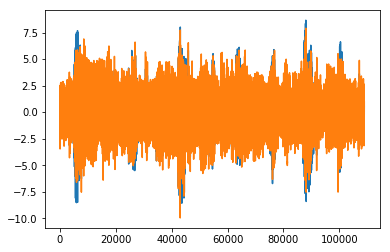

[[-0.45920318 -0.69976909]
 [-0.29272176 -0.51127588]
 [-0.27314042 -0.44760905]
 ..., 
 [ 0.68357496  0.89084405]
 [ 0.77637742  1.01964894]
 [ 0.56352634  0.75438789]]
[[ 364.38171725 -228.79372702]
 [ 495.99446175 -161.9865088 ]]
[  8.34795643e-05   9.76251855e-06]


In [7]:
#print(S)
mixingMatrix1=np.array([[1.1,0.7]])
mixingMatrix2=np.array([[1.5,0.5]])
X1=np.dot(S1,mixingMatrix1.T)
X2=np.dot(S2,mixingMatrix2.T)
plt.figure(2)
plt.plot(X1)
plt.plot(X2)
plt.show()
X=np.c_[X1,X2]
ica = FastICA(n_components=2,whiten=True,max_iter=300)
S_=ica.fit_transform(X)
A_=ica.mixing_
M_=ica.mean_
print(X)
print(A_)
print(M_)

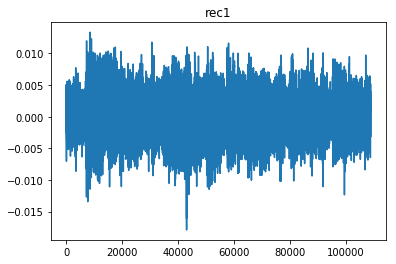

[-0.00157389 -0.00127716 -0.00106791 ...,  0.00170967  0.00197478
  0.00149346]


In [8]:
plt.figure(3)
plt.plot(S_.T[0])
plt.title("rec1")
plt.show()
print(S_.T[0])

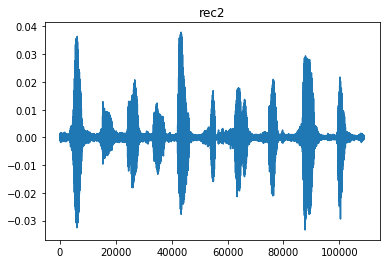

[ -4.99177856e-04  -7.54255572e-04  -5.06589206e-04 ...,  -2.64514389e-04
  -2.47901913e-04  -8.41593590e-05]


In [9]:
plt.figure(4)
plt.plot(S_.T[1])
plt.title("rec2")
plt.show()
print(S_.T[1])

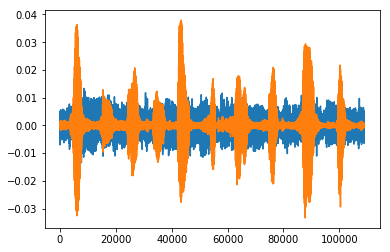

In [10]:
plt.figure(3)
plt.plot(S_.T[0])
plt.plot(S_.T[1])
plt.show()

In [11]:
scipy.io.wavfile.write(resultFilesPrefix+"1.wav",16000,S_.T[0]*2)

In [12]:
scipy.io.wavfile.write(resultFilesPrefix+"2.wav",16000,S_.T[1]*2)

In [13]:
Audio(data=S_.T[0]*2, rate=16000)

In [14]:
Audio(data=S_.T[1]*2, rate=16000)